<a href="https://colab.research.google.com/github/dikoharyadhanto/Data-Visualization-Documentation/blob/main/001-Pengenalan_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pengenalan Matplotlib dan Persiapan Dataset**

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


## **Penambahan Kolom Order Month pada Dataset**

In [ ]:
# Penambahan Kolom Order Month
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]


## **Penambahan Kolom GMV pada Dataset**

In [ ]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


# **Plot Pertama dengan Matplotlib**

## **Membuat Data Agregat**

In [ ]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


## **Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV**

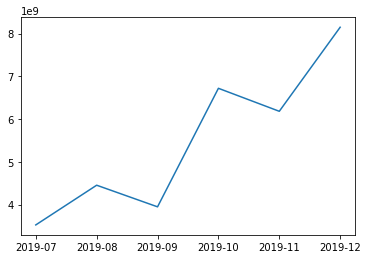

In [ ]:
import matplotlib.pyplot as plt
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

## **Cara Alternatif: Fungsi .plot() pada pandas Dataframe**

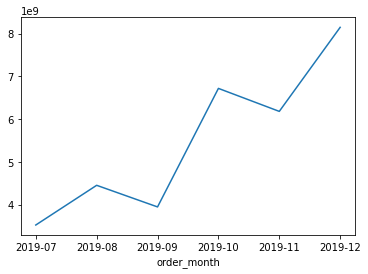

In [ ]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()